In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import  KMeans
from joblib import dump, load
import matplotlib.pyplot as plt


In [7]:
# repertoire (relatif) des ficheirs de données
data_path = '../../Data'
models_path = '../../Models'
df = pd.read_csv('{}/accidents.zip'.format(data_path), compression=dict(method='zip', archive_name='accidents.csv'))


In [8]:
coords=df[['lat','long']]

In [9]:
scores = []

for k in np.arange(10,100) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(coords)
    
    scores.append(kmeans.score(coords))


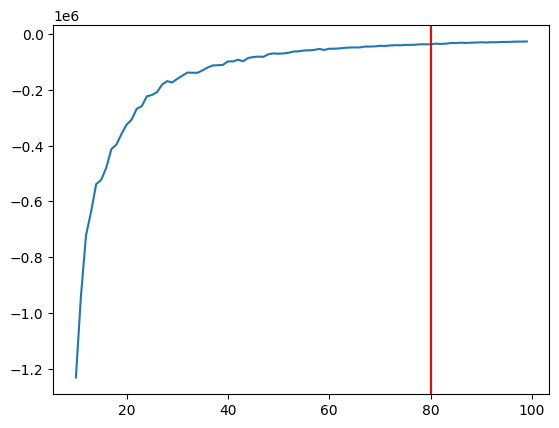

In [10]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10,100), scores)
plt.axvline(80, color='r')

In [11]:
# nous fixons le nombre de clusters à 80
kmeans = KMeans(n_clusters = 80)
kmeans.fit(coords)



centers = kmeans.cluster_centers_
labels = kmeans.labels_

dump(kmeans, '{}/clustering_geoloc.joblib'.format(models_path))


['../../Models/clustering_geoloc.joblib']

In [12]:
df.columns

Index(['mois', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'catr',
       'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'place', 'catu', 'grav',
       'sexe', 'trajet', 'secu_1', 'secu_2', 'secu_3', 'secu_4', 'secu_5',
       'secu_6', 'secu_7', 'secu_8', 'secu_9', 'hh', 'weekend', 'classe_age'],
      dtype='object')

In [13]:
import folium


In [14]:
map = folium.Map(location=[0,0], zoom_start=1)

In [15]:
for label , center in zip(labels, centers) :
    folium.Marker(center, 
                  popup = folium.map.Popup(label, parse_html=True),
                  tooltip= folium.map.Tooltip(permanent=True, text='<b>{}</b><br/>({:.2f}/{:.2f})'.format(label, center[0], center[1]), sticky=False),
                  
                  ).add_to(map)


In [16]:
map.save("{}/centroids.html".format(data_path))

In [17]:
map

In [18]:
#sauvegarde du fichier
df['geoloc'] = kmeans.fit_predict(coords)
df = df.drop(['lat','long'], axis = 1)
df.to_csv('{}/accidents_geolocalises.zip'.format(data_path), index = False, compression=dict(method='zip', archive_name='accidents_geolocalises.csv'))

In [19]:
#fin du fichier